# 통계적 검정 방법
## 분산분석(ANOVA)

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

### 일원분산분석 ( One-way ANOVA )
- 3개 이상의 범주를 갖는 하나의 실험 요인(독립변수)에 대한 하나의 종속변수의 평균 차이를 검정하는 분석
- stats.f_oneway() : scipy f 통계량
- statsmodels.stats.anova() : statsmodels anova
---
- 증명하고자 하는 가설
  - 4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다. 새로 입사한 32명의 시입사원에게 4개 교육기관에서 다른 학습 방법을 적용시켰다. 한 달 간의 훈련기간이 끝난 후 시험을 봤는데 그 점수는 아래와 같다. 4개의 교육훈련 기법 간 차이가 있는가? 만약 있다면 어떻게 다른가?
  - -> 4개 이상의 대응표본을 비교해야 하므로 일원배치 분산분석 기법을 사용해야 한다.
  
  - 귀무가설 : 4개의 교육훈련 기법 간의 차이가 없다.
  - 대립가설 : 4개의 교육훈련 기법 간의 차이가 있다.

In [2]:
# 데이터셋
a = [66, 74, 82, 75, 73, 97, 87, 78]
b = [72, 51, 59, 62, 74, 64, 78, 63]
c = [61, 60, 57, 60, 81, 77, 70, 71]
d = [63, 61, 76, 84, 58, 65, 69, 80]
print(f'a 평균 : {np.mean(a)}')
print(f'b 평균 : {np.mean(b)}')
print(f'c 평균 : {np.mean(c)}')
print(f'd 평균 : {np.mean(d)}')

a 평균 : 79.0
b 평균 : 65.375
c 평균 : 67.125
d 평균 : 69.5


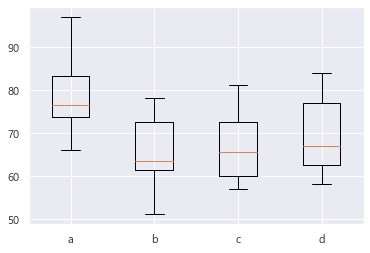

In [7]:
# 이상값 확인
plot_data = [a, b, c, d]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4],['a', 'b', 'c', 'd'])
plt.grid(True)
plt.show()

In [8]:
# 데이터프레임 변환
check = ['a', 'b', 'c', 'd']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수':a+b+c+d, '교육기관':check})

In [9]:
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [24]:
## 정규성 검정 : 자료의 모집단 분포는 정규분포를 따름 
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett

normal_a = shapiro(a)
normal_b = shapiro(b)
normal_c = shapiro(c)
normal_d = shapiro(d)

print('정규성 검정 결과 ( 샤피로 )')
print(normal_a, normal_b, normal_c, normal_d, sep='\n')

print('-'*80)

print('정규성 검정 결과 ( 콜모고로프-스미르노프 )')
print(stats.ks_2samp(a, b), stats.ks_2samp(a, c), stats.ks_2samp(a, d),
      stats.ks_2samp(b, c), stats.ks_2samp(b, d),
      stats.ks_2samp(c, d), sep='\n')

print('-'*80)

## 등분산성 검정 : 모든 집단의 모분산은 동일함
print('등분산성 검정 결과 ( levene )')
print(levene(a, b, c, d))

print('-'*80)

print('등분산성 검정 결과 ( bartlett )')
print(bartlett(a,b,c,d))

정규성 검정 결과 ( 샤피로 )
ShapiroResult(statistic=0.9516036510467529, pvalue=0.7273865938186646)
ShapiroResult(statistic=0.9632648825645447, pvalue=0.8405646681785583)
ShapiroResult(statistic=0.8988886475563049, pvalue=0.2823662757873535)
ShapiroResult(statistic=0.93294757604599, pvalue=0.5432827472686768)
--------------------------------------------------------------------------------
정규성 검정 결과 ( 콜모고로프-스미르노프 )
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
--------------------------------------------------------------------------------
등분산성 검정 결과 ( levene )
LeveneResult(statistic=0.07560756075607561, pvalue=0.972627101462453)
--------------------------------------------------------------------------------
등분산성 검

*[검정 결과 ]*

a, b, c, d 모든 데이터가 p-value > 0.05 보다 크므로 정규성과 등분산성 만족

In [27]:
# F통계량을 이용한 가설 검정
f_statistic, pval = stats.f_oneway(a,b,c,d)

print(f'[F = {f_statistic:.1f}], [p = {pval}]')

if pval < 0.05:
    print('귀무가설 기각, 4개의 교육훈련 기법 간 차이가 있다.')
else:
    print('귀무가설 채택, 4개의 교육훈련 기법 간 차이가 없다.')

[F = 3.5], [p = 0.028896983449837425]
귀무가설 기각, 4개의 교육훈련 기법 간 차이가 있다.


---
Statsmodel을 이용한 가설 검정
- model = ols('종속변수 ~ 독립변수', data).fit() : model
- sm.stats.anova_lm(model, type=2) : Type 2 Anova DataFrame

In [39]:
# Statsmodel을 사용한 일원분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols('점수 ~ C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,885.25,295.083333,3.482176,0.028897
Residual,28.0,2372.75,84.741071,NaN,NaN


In [40]:
# data.shape(32, 2)
# SSA k-1 = 4-1 = 3
# SSE N-k = 32-4 = 28
# SST N-1 = 32-1 = 31
# MSA / MSW = 295.08333 / 84.731071 = 3.482176

In [41]:
pval = anova_lm_result['PR(>F)'][0]
if pval < 0.05:
    print('귀무가설 기각, 4개의 교육훈련 기법 간 차이가 있다.')
else:
    print('귀무가설 채택, 4개의 교육훈련 기법 간 차이가 없다.')

귀무가설 기각, 4개의 교육훈련 기법 간 차이가 있다.


In [42]:
## 사후 분석 : ANOVA 검증 결과 유의미하다는 결론을 얻었을 때,
#             구체적으로 어떤 수준(들)에서 평균 차이가 나는지를 검증
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha=0.05)
HSD.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.625,0.0298,-26.1919,-1.0581,True
a,c,-11.875,0.0692,-24.4419,0.6919,False
a,d,-9.5,0.1896,-22.0669,3.0669,False
b,c,1.75,0.9809,-10.8169,14.3169,False
b,d,4.125,0.8068,-8.4419,16.6919,False
c,d,2.375,0.9546,-10.1919,14.9419,False


***[결론 ]***
- 교육기관에 따른 weight의 평균 차이는 유의미하였다(F(3, 28) = 4.221093, p < 0.05)
- Tukey의 HSD를 이용하여 사후 분석을 실시한 결과, a조건과 b조건에서 유의미한 평균 차이가 있었다 ( p < 0.05 )
---

### 이원분산분석( Two-way ANOVA )
- 종속변수가 1개, 독립변수가 2개이면서 독립변수 각각이 factor(요인)로서 factor 내에 lavel(수준)을 가지고 있을 때, 각 집단의 평균이 유의미한 차이가 있는지 유무를 확인
---
- 증명하고자 하는 가설
  - 귀무가설 : 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 없다.
  - 대립가설 : 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 있다.

In [43]:
# 종속변수 : 강도, 독립변수 : 판유리/온도
dat = pd.DataFrame({'판유리':['유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', '유리3',
                             '유리3', '유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3',
                             '유리3', '유리3', '유리1', '유리1', '유리1', '유리2', '유리2', '유리2',
                             '유리3', '유리3', '유리3'],
                    '온도':[100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125,
                            125, 125, 125, 125, 150, 150, 150, 150, 150, 150, 150, 150, 150],
                    '강도':[580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
                           1035, 1000, 1045, 1053, 1066, 1392, 1380, 1385, 1328, 1312, 1299, 867,
                           904, 889]})

In [44]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [45]:
dat.groupby(['판유리', '온도']).agg(len)
# 판유리 온도 요인으로 구분한 각 집단별 표본 수는 모두 3으로 동일

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [46]:
# 이원분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', dat).fit()
anova_result = pd.DataFrame(anova_lm(model))
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.507143e+05,75357.148148,206.144174,3.922982e-13
C(온도),2.0,1.969825e+06,984912.259259,2694.288855,5.025167e-23
C(판유리):C(온도),4.0,2.903206e+05,72580.148148,198.547518,1.264106e-14
Residual,18.0,6.580000e+03,365.555556,NaN,NaN


***[결과 해석 ]***
- 판유리 : F(2, 18) = 206.370554, p < 0.05로 유의미. 판유리의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- 온도 : F(2, 18) = 2695.259499, p < 0.05로 유의미. 온도의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- 판유리:온도 : F(4, 18) = 198.725707, p < 0.05로 유의미. 상호작용 효과는 발견

In [56]:
## 사후 분석
dat['온도'] = dat['온도'].astype('str')
dat['combi'] = dat.판유리 + '/' + dat.온도
print(pairwise_tukeyhsd(dat['강도'], dat['combi']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
유리1/100 유리1/125  514.6667    0.0  459.9678  569.3655   True
유리1/100 유리1/150     813.0    0.0  758.3012  867.6988   True
유리1/100 유리2/100  -19.6667 0.9307  -74.3655   35.0322  False
유리1/100 유리2/125  462.3333    0.0  407.6345  517.0322   True
유리1/100 유리2/150  740.3333    0.0  685.6345  795.0322   True
유리1/100 유리3/100    0.6667    1.0  -54.0322   55.3655  False
유리1/100 유리3/125     482.0    0.0  427.3012  536.6988   True
유리1/100 유리3/150     314.0    0.0  259.3012  368.6988   True
유리1/125 유리1/150  298.3333    0.0  243.6345  353.0322   True
유리1/125 유리2/100 -534.3333    0.0 -589.0322 -479.6345   True
유리1/125 유리2/125  -52.3333  0.067 -107.0322    2.3655  False
유리1/125 유리2/150  225.6667    0.0  170.9678  280.3655   True
유리1/125 유리3/100    -514.0    0.0 -568.6988 -459.3012   True
유리1/125 유리3/125  -32.6667 0.5066  -87.36